In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import classes/functions
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#define constants
trainDataParquet = "data/trainData_2018-2019";
columns_to_use = [
    'Airline',
    'Origin',
    'Dest',
    'CRSDepTime', 
    'Distance', 
    'Year', 
    'Quarter', 
    'Month', 
    'DayofMonth', 
    'DayOfWeek', 
    'DepTimeBlk', 
    'ArrTimeBlk', 
    'DistanceGroup',
    'OriginAirportID', 
    'OriginAirportSeqID', 
    'OriginCityMarketID', 
    'OriginCityName', 
    'OriginState', 
    'OriginStateFips', 
    'OriginStateName', 
    'OriginWac', 
    'DestAirportID', 
    'DestAirportSeqID', 
    'DestCityMarketID', 
    'DestCityName', 
    'DestState', 
    'DestStateFips', 
    'DestStateName', 
    'DestWac',
    'DepTime', 
    'AirTime', 
    'CRSElapsedTime', 
    'ActualElapsedTime', 
    'DepartureDelayGroups', 
    'TaxiOut', 
    'WheelsOff', 
    'WheelsOn', 
    'TaxiIn', 
    'DivAirportLandings',
    'Marketing_Airline_Network',
    'Operated_or_Branded_Code_Share_Partners',
    'DOT_ID_Marketing_Airline',
    'IATA_Code_Marketing_Airline',
    'Flight_Number_Marketing_Airline',
    'Operating_Airline',
    'DOT_ID_Operating_Airline',
    'IATA_Code_Operating_Airline',
    'Tail_Number',
    'Flight_Number_Operating_Airline'
    ]

In [2]:
#load data
trainingData = pd.read_parquet(trainDataParquet, columns = columns_to_use, engine="fastparquet");
print(trainingData.head());

       Airline  Origin  Dest  CRSDepTime  Distance  Year  Quarter  Month  \
index                                                                      
9           11      22     4        1037     145.0  2018        1      1   
14          11      22     4        1037     145.0  2018        1      1   
15          11      22     4        1037     145.0  2018        1      1   
17          11      22     4        1037     145.0  2018        1      1   
18          11      22     4        1037     145.0  2018        1      1   

       DayofMonth  DayOfWeek  ...  Marketing_Airline_Network  \
index                         ...                              
9               3          3  ...                          3   
14              8          1  ...                          3   
15              9          2  ...                          3   
17             11          4  ...                          3   
18             12          5  ...                          3   

       Operated_or

In [11]:
#calculate uselessness and noisiness of data
#print(np.mean(np.array(trainingData),axis=0));
uselessness = np.std(np.array(trainingData),axis=0)/np.mean(np.array(trainingData),axis=0);
noisiness = np.mean(np.array(trainingData),axis=0)/np.std(np.array(trainingData),axis=0);
print("Uslessness of features:");
print(uselessness);
print();
print("Noisiness of features:");
print(noisiness)

Uslessness of features:
[5.30811929e-01 5.42525804e-01 5.39066106e-01 3.46712456e-01
 7.47669572e-01 2.44550122e-04 4.25241243e-01 5.02694859e-01
 5.52872001e-01 5.05553936e-01 5.52486212e-01 4.86075141e-01
 6.41498842e-01 1.18984634e-01 1.18984177e-01 4.08654430e-02
 6.00867211e-01 6.96935789e-01 6.09691815e-01 7.01038726e-01
 4.83480397e-01 1.19088938e-01 1.19088478e-01 4.11129566e-02
 5.89689527e-01 6.96722704e-01 6.11654259e-01 7.00868268e-01
 4.86619644e-01 3.58259030e-01 6.36561043e-01 5.16204098e-01
 5.22966058e-01 9.39001034e-01 6.36757243e-01 3.54098136e-01
 3.76454687e-01 9.11442622e-01 2.38631012e+03 7.77336840e-01
 6.99892917e-01 1.46927808e-02 7.77336840e-01 7.01313455e-01
 5.62299491e-01 2.02172707e-02 5.62299491e-01 5.65914322e-01
 7.01364318e-01]

Noisiness of features:
[1.88390642e+00 1.84323030e+00 1.85506006e+00 2.88423443e+00
 1.33748923e+00 4.08914129e+03 2.35160633e+00 1.98927835e+00
 1.80873692e+00 1.97802832e+00 1.80999992e+00 2.05729509e+00
 1.55884927e+00 8.40

In [3]:
#test out PCA on the whole dataset
newFeatures = PCA();
newFeatures.fit(trainingData);
print(newFeatures.explained_variance_ratio_);
print(newFeatures.singular_values_);

[5.09943899e-01 4.89746338e-01 1.55081021e-04 7.31831260e-05
 2.53626550e-05 2.12507636e-05 1.80470276e-05 6.88587715e-06
 4.22389063e-06 4.18015167e-06 7.12229054e-07 3.07993142e-07
 1.99163684e-07 1.20232372e-07 1.14573871e-07 2.01328455e-08
 1.58422373e-08 1.46442453e-08 1.34242436e-08 8.33419819e-09
 6.46239766e-09 4.02500060e-09 2.92763969e-09 1.65189314e-09
 1.56939492e-09 1.41423011e-09 9.62802114e-10 9.51040865e-10
 5.86342919e-10 3.50658394e-10 2.78114286e-10 1.83247739e-10
 1.39677891e-10 8.49024573e-11 7.04850658e-11 6.36721268e-11
 2.58823525e-11 2.53813992e-11 5.02214912e-12 2.83275855e-12
 2.00699907e-12 1.38622608e-12 8.47343051e-13 7.69143208e-15
 6.94208253e-15 3.83387781e-18 5.06464760e-33 5.06464760e-33
 5.06464760e-33]
[3.64559467e+08 3.57266898e+08 6.35750203e+06 4.36729631e+06
 2.57101457e+06 2.35339296e+06 2.16875264e+06 1.33963602e+06
 1.04921264e+06 1.04376613e+06 4.30840999e+05 2.83320307e+05
 2.27830706e+05 1.77018187e+05 1.72802481e+05 7.24368843e+04
 6.4256

In [5]:
#create reduced space (likely unneccesary unless we want to use the transformed space for our features)
newFeatures = PCA(n_components = 2);
newFeatures.fit(trainingData);

[[ 1.27139810e-06  4.29914491e-04  4.96947320e-04 ...  2.97825293e-06
  -5.96878688e-04 -5.26334402e-04]
 [ 3.36841219e-07  4.97349611e-04 -4.30566828e-04 ...  4.36427949e-07
  -5.52108438e-05  3.31937357e-05]
 [ 1.30176634e-04  5.22587285e-05  5.29122088e-05 ...  7.41719565e-04
  -3.91740156e-02  7.02507097e-01]
 ...
 [-0.00000000e+00  1.29101075e-16  9.93497428e-16 ... -6.69539780e-01
  -1.90819582e-17 -1.38777878e-17]
 [-0.00000000e+00 -4.64905892e-16  1.71286917e-17 ... -1.63822492e-01
  -2.08166817e-17 -2.08166817e-17]
 [ 0.00000000e+00  2.77555756e-16  3.88708532e-16 ... -1.57729752e-01
   3.46944695e-17  1.38777878e-17]]


<ipython-input-12-1ce9aa9ae8d6>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure();


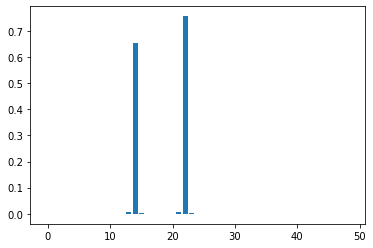

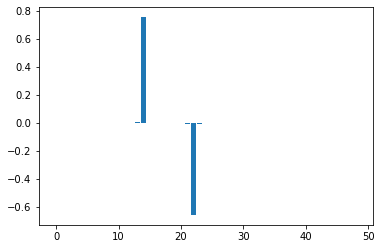

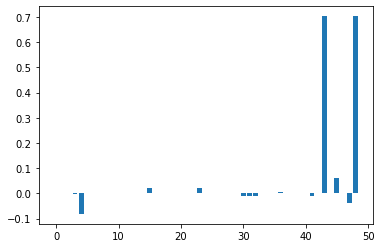

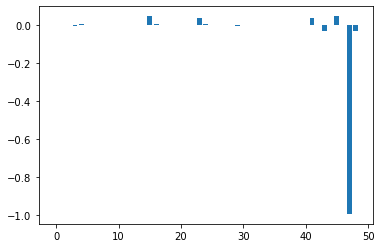

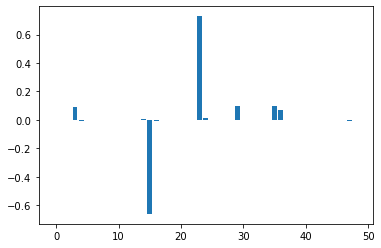

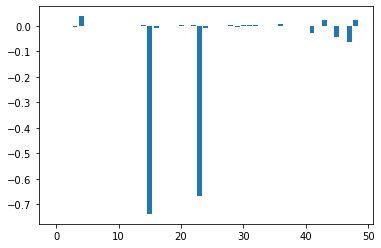

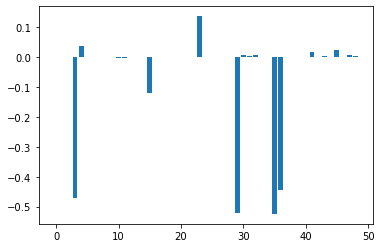

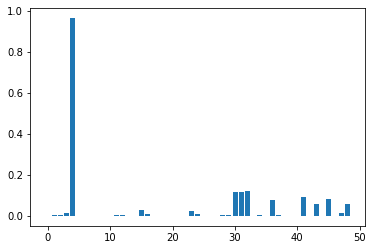

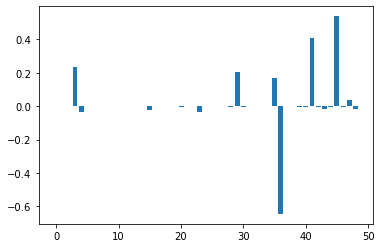

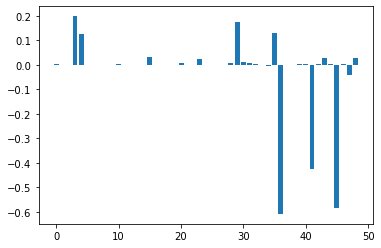

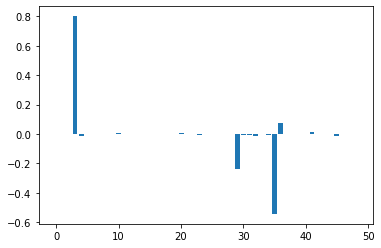

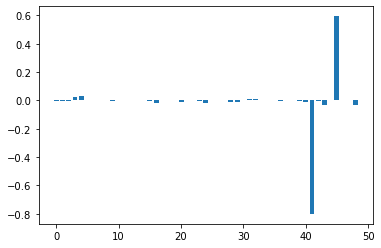

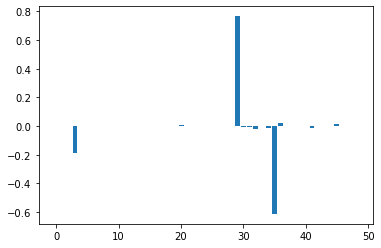

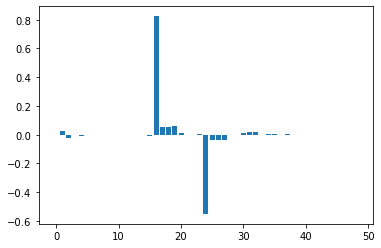

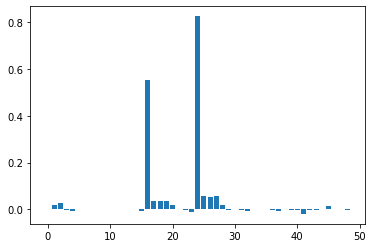

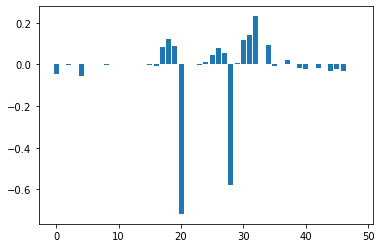

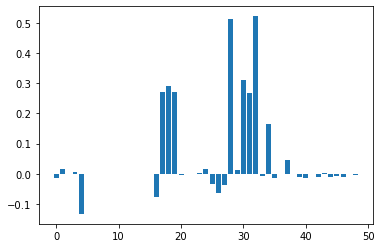

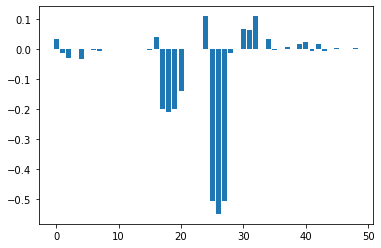

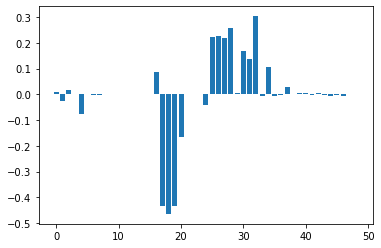

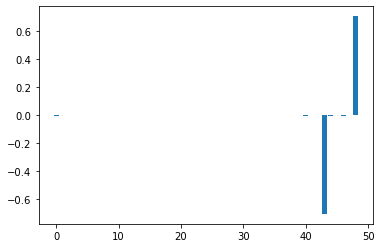

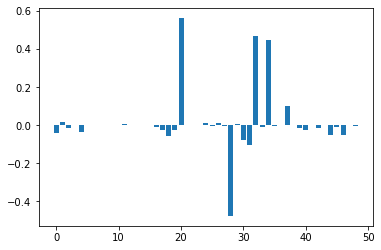

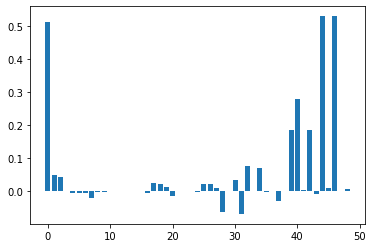

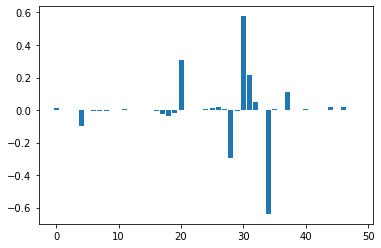

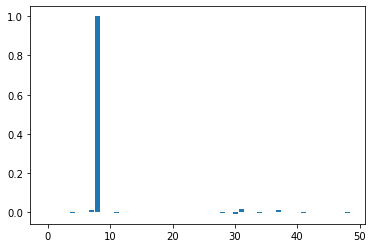

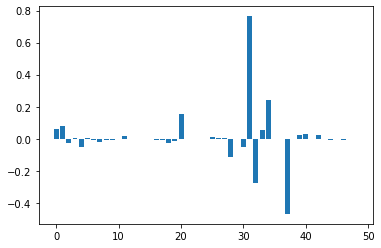

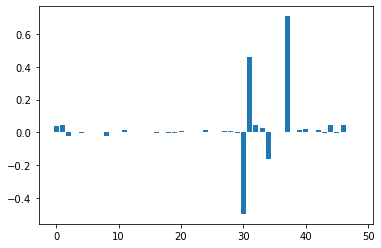

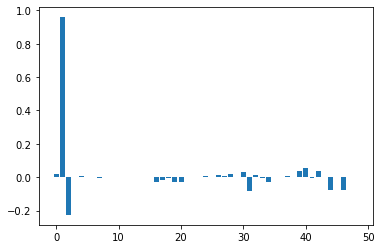

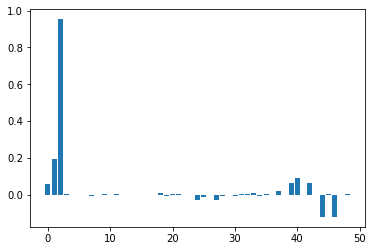

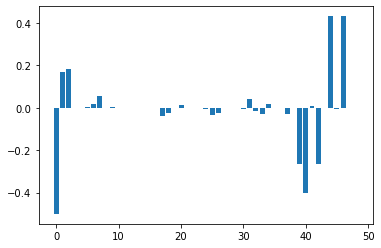

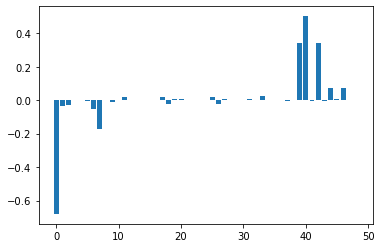

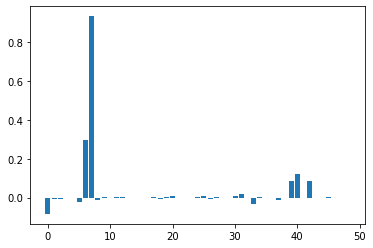

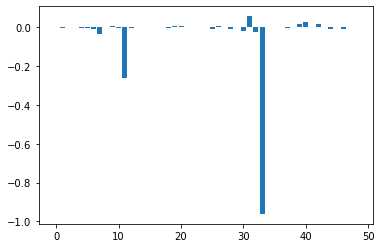

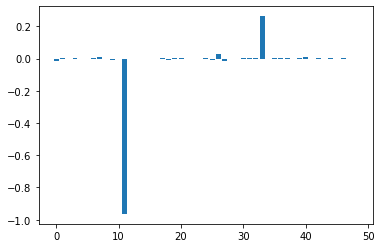

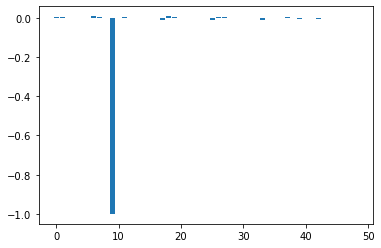

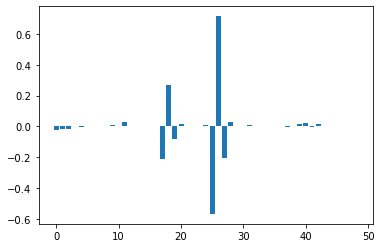

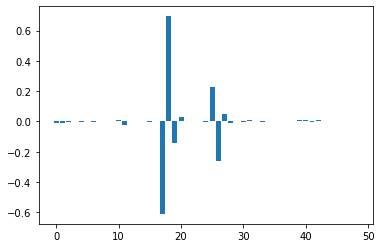

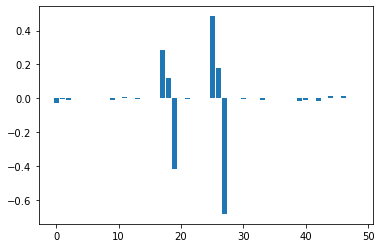

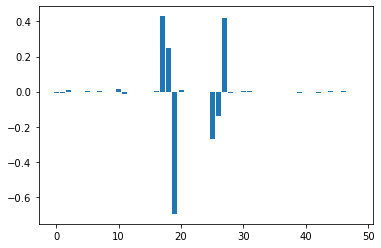

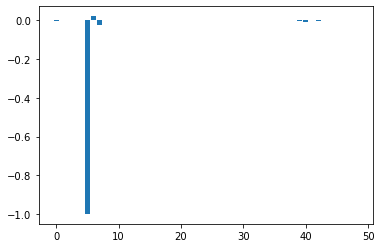

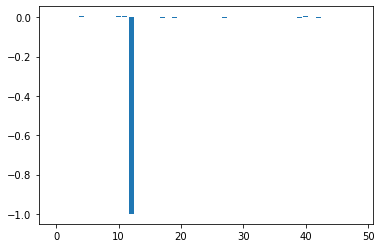

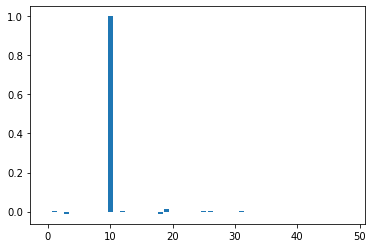

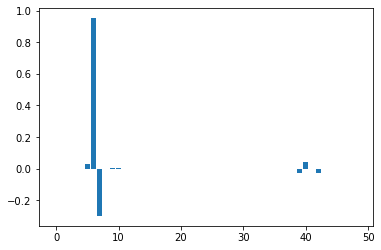

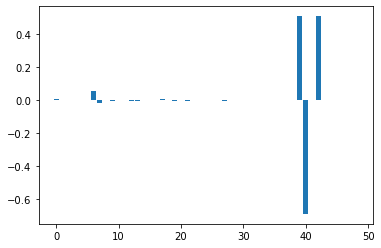

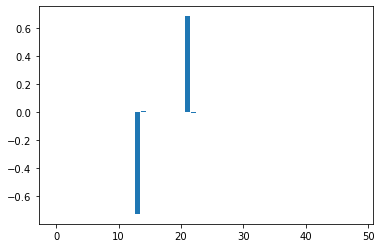

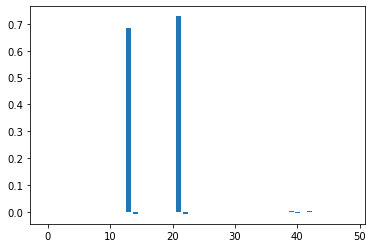

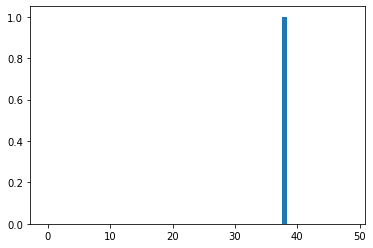

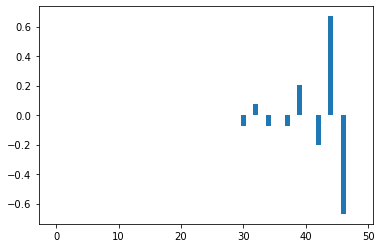

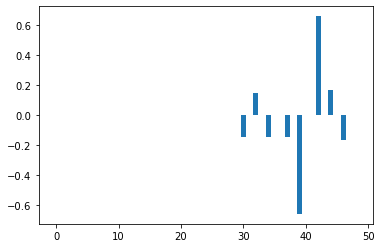

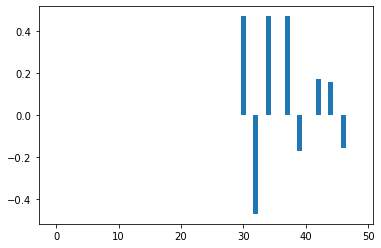

In [12]:
#create graphs of the importance vectors
print(newFeatures.components_);
#newData = pd.DataFrame(newFeatures.components_, columns=["PC1","PC2"]);
#newData.to_parquet("data/trainDataPCA_2018-2019")
for i in range(np.size(columns_to_use)):
    plt.figure();
    plt.bar(np.arange(np.size(newFeatures.components_[i,:])),newFeatures.components_[i,:]);

[ 1.27139810e-06  4.29914491e-04  4.96947320e-04 -2.61276450e-05
  3.43471127e-04 -6.11066480e-08 -1.17259873e-07 -3.06769932e-07
  1.00260858e-07  3.87620332e-08 -2.47374011e-07  1.96576385e-09
  1.43343266e-06  6.54354701e-03  6.54354306e-01  3.37622200e-03
  3.14701085e-04 -9.00049225e-06 -1.16832834e-05 -1.02831978e-05
  4.37004459e-05  7.56103673e-03  7.56103168e-01  3.91531870e-03
  3.65615052e-04 -9.18728258e-06 -1.17802434e-05 -1.04231736e-05
  4.74918389e-05 -2.38572870e-05  4.14158650e-05  3.89756402e-05
  3.98454460e-05 -3.31061404e-07 -8.59903141e-07 -2.39221496e-05
  2.92636543e-05 -7.10515836e-07 -6.70496547e-13  9.52366817e-07
  1.30076598e-06 -4.25729865e-05  9.52366817e-07 -5.26253873e-04
  2.97825293e-06 -1.35534850e-04  2.97825293e-06 -5.96878688e-04
 -5.26334402e-04]
[ 3.36841219e-07  4.97349611e-04 -4.30566828e-04 -1.21415657e-04
  7.86543635e-06 -1.54277924e-08  1.26081188e-08  3.96633631e-08
  2.00000073e-08 -5.70088337e-09 -1.17547892e-06 -5.55083168e-07
  3.785

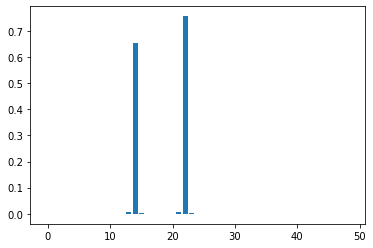

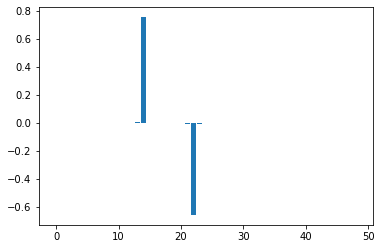

In [8]:
print(newFeatures.components_[0,:]);
print(newFeatures.components_[1,:]);
print(newFeatures.components_[0,2]);
plt.figure();
plt.bar(np.arange(np.size(newFeatures.components_[0,:])),newFeatures.components_[0,:]);
plt.figure();
plt.bar(np.arange(np.size(newFeatures.components_[1,:])),newFeatures.components_[1,:]);